# Week 10 : Case Study 6 - Bimal H M

## Data Preprocessing

### STEP 1 : Importing all Necessary Libraries in to Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Q1 : Load the dataset into python environment

In [2]:
data = pd.read_csv('titanic_dataset.csv')

#### A) Displaying First few Rows

In [3]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Q2 : Make ‘PassengerId’ as the index column

In [4]:
data = data.set_index('PassengerId')

In [5]:
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


### Q3 : Check the basic details of the dataset

#### A) Displaying Dataset Info

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


#### B) Checking for summary statistics

In [7]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Q4) Fill in all the missing values present in all the columns in the dataset

#### A) Checking Datatypes

In [8]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

#### B) Checking for Null Values

In [9]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

###### From the above results it is clear that there is missing values present in Age (Float datatype), Cabin(Object datatype) and Embarked(Object datatype). So now we will plot a histogram of Age column to check the skewness & fill missing values accordingly and fill missing values of other two object datatypes with mode value. 

#### C) Ploting histogram of Age data and filling missing values of all 3 columns

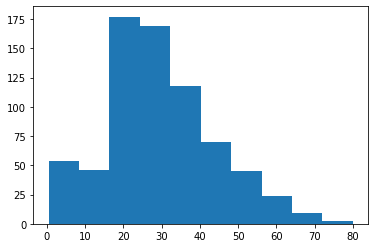

In [10]:
plt.hist(data['Age'])
plt.show()

###### Since data is skewed missing values will be replaced by Median, and fillinng missing values of other column with mode of respective columns

In [11]:
data['Age']=data['Age'].fillna(data['Age'].median())
data['Cabin']=data['Cabin'].fillna(data['Cabin'].mode()[0])
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

###### Checking for null values again

In [12]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### Q5 : Check and handle outliers in at least 3 columns in the dataset

###### We can check and handle outliers of Int or float datatype . 

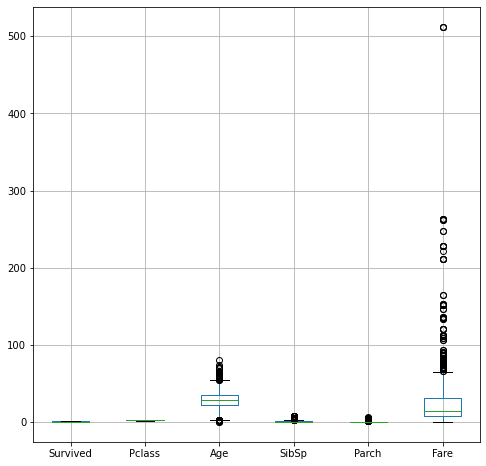

In [13]:
BoxP = data.select_dtypes(include=['int64','float64'])
BoxP.boxplot(figsize = (8,8))
plt.show()

###### From boxplot we can see notable outlairs are present in Age, SibSp, Parch and Fare columns. Lets remove outlairs from Age, Parch and Fare columns

#### A) Handling outliers from - Age

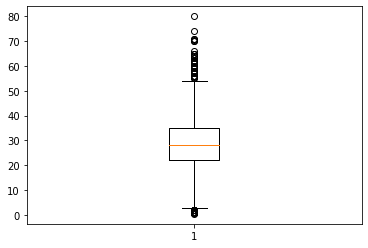

In [14]:
plt.boxplot(data['Age'])
plt.show()

###### Finding Q1,Q2,Q3 , IQR and Lower and Upper limits to determine outliers

In [15]:
# Q1,Q2,Q3
Q1 = np.percentile(data['Age'],25,interpolation='midpoint')
Q2 = np.percentile(data['Age'],50,interpolation='midpoint')
Q3 = np.percentile(data['Age'],75,interpolation='midpoint')

#IQR
print(' Q1 = ',Q1,'\n Q2 = ',Q2,'\n Q3 = ',Q3)
IQR = Q3-Q1
print('IQR = ',IQR)

#Outleir limits
LL = Q1 - (1.5 * IQR)
UL = Q3 + (1.5 * IQR)
print('Lower limit = ',LL,'\nUpper limit = ',UL)

 Q1 =  22.0 
 Q2 =  28.0 
 Q3 =  35.0
IQR =  13.0
Lower limit =  2.5 
Upper limit =  54.5


###### Finding index values of outliers and removing them from dataset

In [16]:
#Finding Corresponding index numbers
ind1 = data.loc[(data['Age']>UL) | (data['Age']<LL)].index

#Removing these index values
data.drop(ind1,inplace=True)

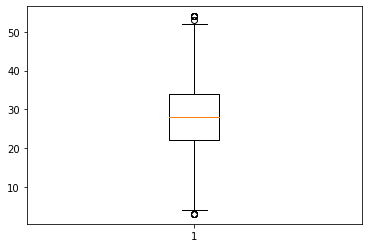

In [17]:
plt.boxplot(data.Age)
plt.show()

#### B) Handling outliers from - Parch

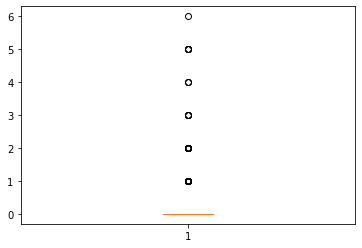

In [18]:
plt.boxplot(data['Parch'])
plt.show()

In [19]:
# Q1,Q2,Q3
Q1 = np.percentile(data['Parch'],25,interpolation='midpoint')
Q2 = np.percentile(data['Parch'],50,interpolation='midpoint')
Q3 = np.percentile(data['Parch'],75,interpolation='midpoint')

#IQR
print(' Q1 = ',Q1,'\n Q2 = ',Q2,'\n Q3 = ',Q3)
IQR = Q3 - Q1
print('IQR = ',IQR)

#Outleir limits
LL = Q1 - (1.5 * IQR)
UL = Q3 + (1.5 * IQR)
print('Lower limit = ',LL,'\nUpper limit = ',UL)

 Q1 =  0.0 
 Q2 =  0.0 
 Q3 =  0.0
IQR =  0.0
Lower limit =  0.0 
Upper limit =  0.0


In [20]:
#Finding Corresponding index numbers
ind2 = data.loc[(data['Parch']>UL)|(data['Parch']<LL)].index

#Removing these index values
data.drop(ind2,inplace=True)

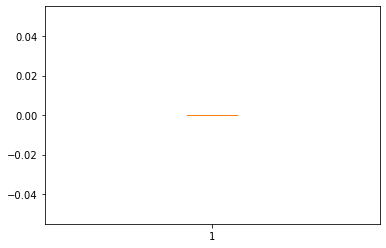

In [21]:
plt.boxplot(data['Parch'])
plt.show()

#### C) Handling outliers from - Fare

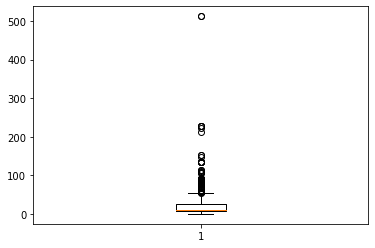

In [22]:
plt.boxplot(data['Fare'])
plt.show()

In [23]:
# Q1,Q2,Q3
Q1 = np.percentile(data['Fare'],25,interpolation='midpoint')
Q2 = np.percentile(data['Fare'],50,interpolation='midpoint')
Q3 = np.percentile(data['Fare'],75,interpolation='midpoint')

#IQR
print(' Q1 = ',Q1,'\n Q2 = ',Q2,'\n Q3 = ',Q3)
IQR = Q3 - Q1
print('IQR = ',IQR)

#Outleir limits
LL = Q1 - (1.5 * IQR)
UL = Q3 + (1.5 * IQR)
print('Lower limit = ',LL,'\nUpper limit = ',UL)

 Q1 =  7.8542 
 Q2 =  10.3354 
 Q3 =  26.0
IQR =  18.1458
Lower limit =  -19.364500000000003 
Upper limit =  53.2187


In [24]:
#Finding Corresponding index numbers
ind3 = data.loc[(data['Fare']>UL) | (data['Fare']<LL)].index

#Removing these index values
data.drop(ind3,inplace=True)

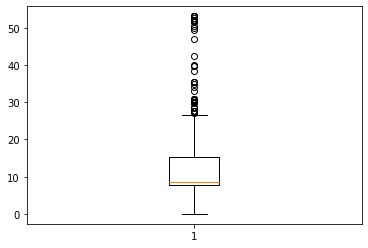

In [25]:
plt.boxplot(data['Fare'])
plt.show()

### Q6 : Do min max scaling on the feature set (Take ‘Survived’ as target)

In [26]:
y=data['Survived']                                        #Dependent variable
x=data.drop(['Survived','Name','Ticket','Cabin'],axis=1)  #indipendent (other than catagorical) variavles
x=pd.get_dummies(x)
x

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,1,0,0,1
3,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,0,1
5,3,35.0,0,0,8.0500,0,1,0,0,1
6,3,28.0,0,0,8.4583,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
885,3,25.0,0,0,7.0500,0,1,0,0,1
887,2,27.0,0,0,13.0000,0,1,0,0,1
888,1,19.0,0,0,30.0000,1,0,0,0,1


In [27]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [28]:
from sklearn import linear_model

lr=linear_model.LinearRegression()
model1=lr.fit(x_train,y_train)
predictions1=model1.predict(x_test)

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

MSE=mean_squared_error(predictions1,y_test)
print('MSrE of the model     = ',round(MSE,3))

R2=r2_score(predictions1,y_test)
print('R2 value of the model = ',round(R2,3))

MSrE of the model     =  0.158
R2 value of the model =  -1.126


In [30]:
#min max scaling
from sklearn import preprocessing
min_max=preprocessing.MinMaxScaler()
x=min_max.fit_transform(x)
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8,9
count,563.000000,563.000000,563.000000,563.0,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000
mean,0.760213,0.493457,0.066903,0.0,0.258844,0.250444,0.749556,0.134991,0.113677,0.751332
std,0.358250,0.172441,0.156776,0.0,0.198616,0.433654,0.433654,0.342018,0.317701,0.432625
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.387755,0.000000,0.0,0.146422,0.000000,0.500000,0.000000,0.000000,1.000000
50%,1.000000,0.469388,0.000000,0.0,0.162979,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.556122,0.000000,0.0,0.288136,0.500000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)
#Linear model
from sklearn import linear_model
lr=linear_model.LinearRegression()
model1=lr.fit(x_train,y_train)
predictions1=model1.predict(x_test)
from sklearn.metrics import mean_squared_error
MSE2=mean_squared_error(predictions1,y_test)
print('MSE of new model  = ', round(MSE2,2))

MSE of new model  =  0.14


###### Hence Min Max scaling reduced MSE of model